### Problem Statement
In Southeast Asia, countries with weaker vital registration systems and measurement capacity are likely under-capturing maternal mortality, creating a gap between observed maternal deaths and improved estimates after modeling and adjustment.

# Hypothesis #1: Clustering Methods Comparison

K-means is better suited than the Gaussian Mixture Model (GMM) for clustering MMR data in SEA because of its simpler and more direct methodology analysis.

# Hypothesis #2: Dimensionality Reduction Comparison

ICA is the most effective in analysing maternal mortality data as it identifies statistically independent components, allowing for effective separation of hidden factors that variance-based methods, such as PCA or distance-preserving techniques or RP.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
df = pd.read_csv("main_data.csv", header =0)
df.head()

,iso_alpha_3_code,year_start,year_end,year_mid,env_total,env_mat,truemat_vr,truemat,truemat_vr_unscaled,truemat_unscaled,...,mdeathspluslate,ramos...yes.1.,comments,env_total_lifetables,live_births_lifetables,final_mmr,final_pm_before_crisis,final_mmr_before_crisis,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata
0,AUS,1985.0,1997.0,1991.0,NaN,250.0,250.0,NaN,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000082,0.006147,0.000082,40628.0,3035000.0
1,AUS,1994.0,1997.0,1995.5,NaN,80.0,80.0,80.0,80.0,80.0,...,NaN,NaN,NaN,NaN,NaN,0.000104,0.007782,0.000104,10280.0,766000.0
2,AUS,1997.0,2000.0,1998.5,NaN,54.0,54.0,NaN,54.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000072,0.005041,0.000072,10721.0,747000.0
3,AUS,2000.0,2003.0,2001.5,NaN,44.0,44.0,NaN,44.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000059,0.004332,0.000059,10163.0,745000.0
4,AUS,2006.0,2011.0,2008.5,NaN,63.0,63.0,NaN,63.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000043,0.003871,0.000043,16191.0,1453000.0


In [51]:
unique_codes = df['iso_alpha_3_code'].unique()
print(unique_codes)

['AUS' 'AUT' 'BRA' 'CAN' 'CHL' 'COL' 'CRI' 'DNK' 'DOM' 'ECU' 'FIN' 'FRA'
 'GBR' 'GEO' 'GTM' 'IRL' 'ISL' 'ISR' 'JAM' 'JPN' 'KAZ' 'KOR' 'MDA' 'MYS'
 'NLD' 'NZL' 'PRT' 'PRY' 'SGP' 'SLV' 'SUR' 'SWE' 'THA' 'URY' 'USA' 'ARG'
 'SVN' 'CUB' 'PAN' 'PER' 'ITA' 'HND' 'JOR' 'LBN' 'MAR' 'MEX' 'NOR' 'PSE'
 'SRB' 'TUN' 'TUR' 'VNM' 'ZWE' 'IND' 'CPV' 'EGY' 'LBY' 'MUS' 'STP' 'SYC'
 'ZAF' 'ATG' 'BHS' 'BRB' 'BLZ' 'BOL' 'GRD' 'GUY' 'HTI' 'NIC' 'PRI' 'LCA'
 'VCT' 'TTO' 'VEN' 'BHR' 'BRN' 'CYP' 'IRN' 'IRQ' 'KWT' 'MDV' 'MNG' 'OMN'
 'PHL' 'QAT' 'SAU' 'LKA' 'SYR' 'ALB' 'ARM' 'AZE' 'BLR' 'BEL' 'BIH' 'BGR'
 'HRV' 'CZE' 'EST' 'DEU' 'GRC' 'HUN' 'KGZ' 'LVA' 'LTU' 'LUX' 'MKD' 'MLT'
 'MNE' 'POL' 'ROU' 'RUS' 'SVK' 'ESP' 'CHE' 'TJK' 'TKM' 'UKR' 'UZB' 'FJI'
 'KIR' 'SLB' 'ARE' 'TLS' 'SLE' 'BTN' 'KHM' 'MDG' 'MWI' 'MOZ' 'BEN' 'BFA'
 'ETH' 'GHA' 'GMB' 'GNB' 'KEN' 'LAO' 'LSO' 'LBR' 'MLI' 'MMR' 'NAM' 'NPL'
 'PRK' 'RWA' 'SDN' 'SSD' 'SWZ' 'TZA' 'ZMB' 'AFG' 'AGO' 'BGD' 'BDI' 'CMR'
 'CAF' 'TCD' 'COM' 'COG' 'CIV' 'COD' 'GNQ' 'ERI' 'G

In [52]:
# Only include countries in SEA
SEA_ISO3 = ['BRN', 'KHM', 'IDN', 'LAO', 'MYS', 'MMR', 'PHL', 'SGP', 'THA', 'TLS', 'VNM']
df_sea = df[df['iso_alpha_3_code'].isin(SEA_ISO3)]
df_sea.head()

,iso_alpha_3_code,year_start,year_end,year_mid,env_total,env_mat,truemat_vr,truemat,truemat_vr_unscaled,truemat_unscaled,...,mdeathspluslate,ramos...yes.1.,comments,env_total_lifetables,live_births_lifetables,final_mmr,final_pm_before_crisis,final_mmr_before_crisis,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata
154,MYS,1992.0,1993.0,1992.5,NaN,251.0,219.0,251.0,219.0,251.0,...,NaN,NaN,NaN,NaN,NaN,0.000486,0.040873,0.000486,6141.0,516000.0
155,MYS,1993.0,1994.0,1993.5,NaN,246.0,217.0,246.0,217.0,246.0,...,NaN,NaN,NaN,NaN,NaN,0.000467,0.039297,0.000467,6260.0,527000.0
156,MYS,1994.0,1995.0,1994.5,NaN,208.0,191.0,208.0,191.0,208.0,...,NaN,NaN,NaN,NaN,NaN,0.000387,0.033095,0.000387,6285.0,537000.0
157,MYS,1995.0,1996.0,1995.5,NaN,251.0,232.0,251.0,232.0,251.0,...,NaN,NaN,NaN,NaN,NaN,0.000461,0.039299,0.000461,6387.0,544000.0
158,MYS,1996.0,1997.0,1996.5,NaN,220.0,206.0,220.0,206.0,220.0,...,NaN,NaN,NaN,NaN,NaN,0.000401,0.032929,0.000401,6681.0,549000.0


In [53]:
df_sea.columns.tolist()

['iso_alpha_3_code',
 'year_start',
 'year_end',
 'year_mid',
 'env_total',
 'env_mat',
 'truemat_vr',
 'truemat',
 'truemat_vr_unscaled',
 'truemat_unscaled',
 'tp',
 'tn',
 'fp',
 'fn',
 'up',
 'un',
 'include',
 'include_bmis_global',
 'include_bmis',
 'include_bmat_reason',
 'include_bmis_reason',
 'incomplete_vr_multiplier',
 'check_outside_of_vr',
 'study_period_coverage',
 'citation_short',
 'citation_long',
 'completeness_inq',
 'complete_vr',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'obs_selogpm',
 'type',
 'definition',
 'mat_vr',
 'nonmat_vr',
 'tot',
 'tot_vr',
 'rho_ref',
 'mat_vr_ref',
 'tot_vr_ref',
 'tot_ref',
 'dmname',
 'iso_country_name',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'exclude_reason',
 'icd_utilized',
 'icd',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vradj',
 'ytot_bm

In [54]:
# Drop columns with > 150 NAs to avoid distorting results
nan_counts = df_sea.isnull().sum()
cols_to_drop = nan_counts[nan_counts > 150].index
cols_to_drop

Index(['env_total', 'env_mat', 'truemat_vr', 'truemat', 'truemat_vr_unscaled',
       'truemat_unscaled', 'tp', 'tn', 'fp', 'fn', 'up', 'un',
       'include_bmis_global', 'include_bmis', 'include_bmat_reason',
       'include_bmis_reason', 'incomplete_vr_multiplier',
       'check_outside_of_vr', 'study_period_coverage', 'citation_long',
       'completeness_inq', 'complete_vr', 'obs_selogpm', 'mat_vr', 'nonmat_vr',
       'tot', 'tot_vr', 'rho_ref', 'mat_vr_ref', 'tot_vr_ref', 'tot_ref',
       'dmname', 'exclude_reason', 'name', 'id',
       'ori_vr_data_from_paho_update', 'env_total_imputed',
       'live_births_imputed', 'env_pregrelated', 'mmr', 'live_births', 'refID',
       'mdeathspluslate', 'ramos...yes.1.', 'comments', 'env_total_lifetables',
       'live_births_lifetables'],
      dtype='object')

In [55]:
# Display the shape of the new DataFrame to see how many columns were dropped
df_sea_dropped = df_sea.drop(columns=cols_to_drop)
print("Original shape:", df_sea.shape)
print("Shape after dropping columns with > 150 NaNs:", df_sea_dropped.shape)

Original shape: (186, 104)
Shape after dropping columns with > 150 NaNs: (186, 57)


In [56]:
df_sea_dropped.columns.tolist()

['iso_alpha_3_code',
 'year_start',
 'year_end',
 'year_mid',
 'include',
 'citation_short',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'iso_country_name',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'icd_utilized',
 'icd',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vradj',
 'ytot_bmis',
 'rho_bmis',
 'vrenv_bmat',
 'ytot_bmat',
 'rho_bmat',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'final_pm_before_crisis',
 'final_mmr_before_crisis',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birthsdata']

In [57]:
# Year start, year end, year mid are essentially the same
df_sea_dropped = df_sea_dropped.drop(columns=['year_end', 'year_mid'])
print("year change: ", df_sea_dropped.shape)

# Do not need the full countries name as we already have iso 3 code
df_sea_dropped = df_sea_dropped.drop(columns=['iso_country_name'])
print("country change: ", df_sea_dropped.shape)

# Do not need the citation sources
df_sea_dropped = df_sea_dropped.drop(columns=['citation_short'])
print("citation change: ", df_sea_dropped.shape)

# Do not need to know the icd version used to code the death
df_sea_dropped = df_sea_dropped.drop(columns=['icd', 'icd_utilized'])
print("icd change: ", df_sea_dropped.shape)

year change:  (186, 55)
country change:  (186, 54)
citation change:  (186, 53)
icd change:  (186, 51)


<Axes: >

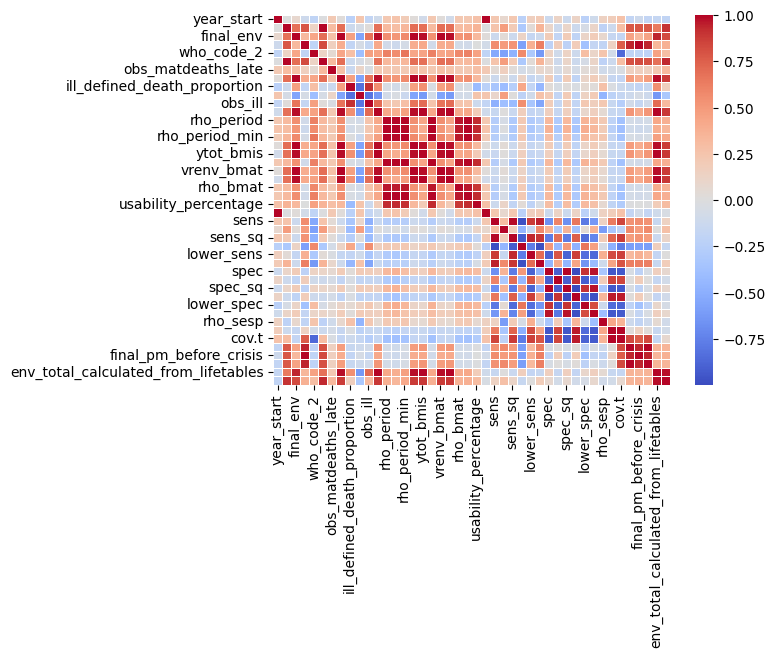

In [58]:
# Keep only numeric columns
numeric_df = df_sea_dropped.select_dtypes(include='number')
sb.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')

In [59]:
# Rho period is estimated by the model and hence isnt part of the data, can be dropped
df_sea_dropped = df_sea_dropped.drop(columns=['rho_bmat', 'rho_bmis'])
print("rho change: ", df_sea_dropped.shape)

rho change:  (186, 49)


In [60]:
df_sea_dropped.columns.tolist()

['iso_alpha_3_code',
 'year_start',
 'include',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'env_total_who_estimated',
 'include_hasvrdata',
 'rho_period',
 'rho_period_max',
 'rho_period_min',
 'vrenv_vradj',
 'ytot_bmis',
 'vrenv_bmat',
 'ytot_bmat',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'final_pm_before_crisis',
 'final_mmr_before_crisis',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birthsdata']

In [61]:
# Deleting other duplicate columns as well
columns = ['ytot_bmat', 'vrenv_bmat', 'ytot_bmis', 'final_pm_before_crisis', 'final_mmr_before_crisis', 'rho_period', 'rho_period_max', 'rho_period_min', 'include_hasvrdata', 'vrenv_vradj']
df_sea_dropped = df_sea_dropped.drop(columns=columns)
print("duplicate columns change: ", df_sea_dropped.shape)

duplicate columns change:  (186, 39)


In [62]:
df_sea_dropped.columns.tolist()

['iso_alpha_3_code',
 'year_start',
 'include',
 'obs_matdeaths',
 'final_env',
 'final_pm',
 'type',
 'definition',
 'who_code_2',
 'obs_matdeaths_incl_late',
 'obs_matdeaths_late',
 'obs_env',
 'ill_defined_death_proportion',
 'ill_defined_death_proportion2',
 'obs_ill',
 'env_total_who_estimated',
 'rho_intermediate',
 'usability_percentage',
 'include_reason',
 'special_case',
 't',
 'sens',
 'var_sens',
 'sens_sq',
 'oneminsens_sq',
 'lower_sens',
 'upper_sens',
 'spec',
 'var_spec',
 'spec_sq',
 'oneminspec_sq',
 'lower_spec',
 'upper_spec',
 'rho_sesp',
 'cov_sesp',
 'cov.t',
 'final_mmr',
 'env_total_calculated_from_lifetables',
 'live_births_calculated_from_birthsdata']

<Axes: >

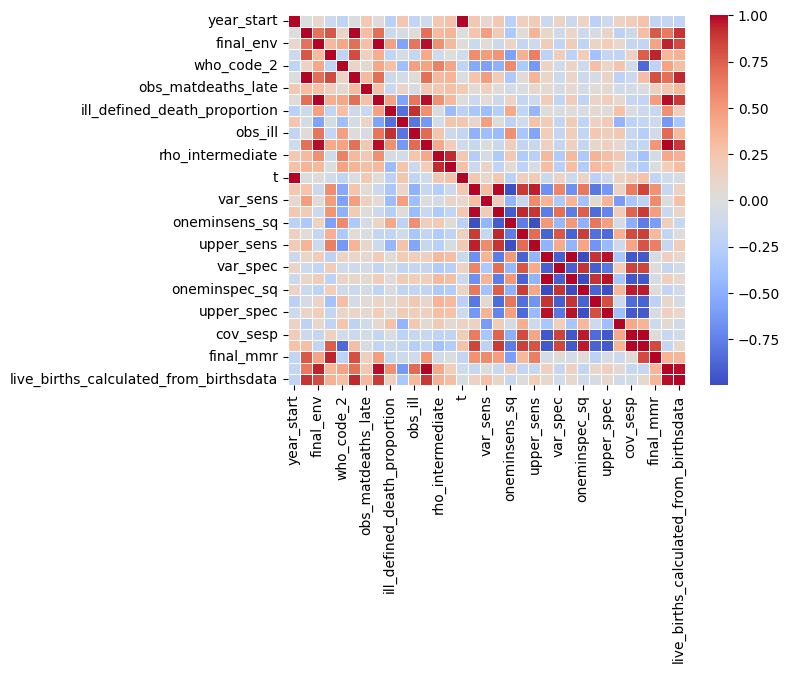

In [63]:
numeric_df = df_sea_dropped.select_dtypes(include='number')
sb.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5, linecolor='white')

In [64]:
# Identify and remove non-numeric columns
numeric_df_cleaned = df_sea_dropped.select_dtypes(include=np.number)

# Remove rows with missing values
numeric_df_cleaned = numeric_df_cleaned.dropna()

print("Shape after removing non-numeric columns and rows with NaNs:", numeric_df_cleaned.shape)

Shape after removing non-numeric columns and rows with NaNs: (35, 33)


In [65]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df_cleaned)

print("Shape after scaling:", scaled_data.shape)

Shape after scaling: (35, 33)


# K-Means method



## Determing the number of cluster for K-means

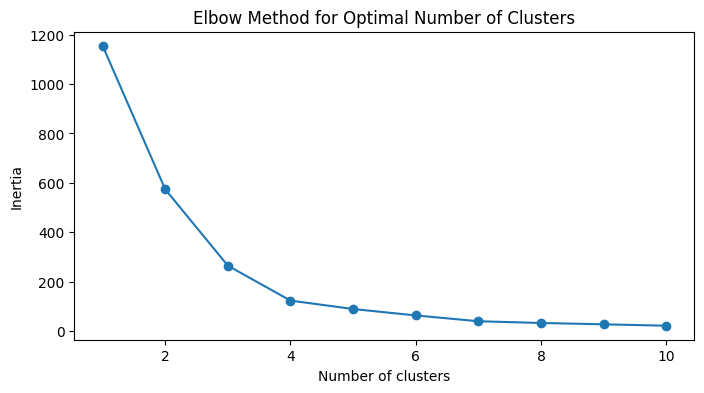

In [66]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

Based on the elbow method plot, we choose an optimal number of clusters (n=3 in this case) and proceed with the K-Means clustering in the next step.

In [67]:
# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add the cluster assignments to the cleaned numeric DataFrame
numeric_df_cleaned['cluster'] = clusters

display(numeric_df_cleaned.head())

,year_start,obs_matdeaths,final_env,final_pm,who_code_2,obs_matdeaths_incl_late,obs_matdeaths_late,obs_env,ill_defined_death_proportion,ill_defined_death_proportion2,...,oneminspec_sq,lower_spec,upper_spec,rho_sesp,cov_sesp,cov.t,final_mmr,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata,cluster
1721,2003.0,137.0,4709.0,0.029093,3236.0,137.0,0.0,4709.0,0.065619,0.572733,...,0.000018,0.989896,0.998403,0.269359,0.000057,0.000057,0.000423,6921.0,476000.0,2
1722,2004.0,128.0,4748.0,0.026959,3236.0,128.0,0.0,4748.0,0.070345,0.552864,...,0.000018,0.990150,0.998151,0.305954,0.000059,0.000059,0.000406,6969.0,463000.0,2
1723,2005.0,127.0,4905.0,0.025892,3236.0,127.0,0.0,4905.0,0.071356,0.552294,...,0.000019,0.991113,0.997743,0.447017,0.000075,0.000075,0.000393,6934.0,457000.0,2
1727,2009.0,134.0,4786.0,0.027998,3236.0,134.0,0.0,4786.0,0.032595,0.570205,...,0.000023,0.990272,0.997713,0.494626,0.000135,0.000135,0.000399,6954.0,488000.0,2
1728,2010.0,128.0,4938.0,0.025921,3236.0,128.0,0.0,4938.0,0.039692,0.571689,...,0.000023,0.989233,0.997951,0.354035,0.000127,0.000127,0.000361,6785.0,487000.0,2


Number of clusters: 3

Points per cluster:
cluster
0     9
1    17
2     9
Name: count, dtype: int64


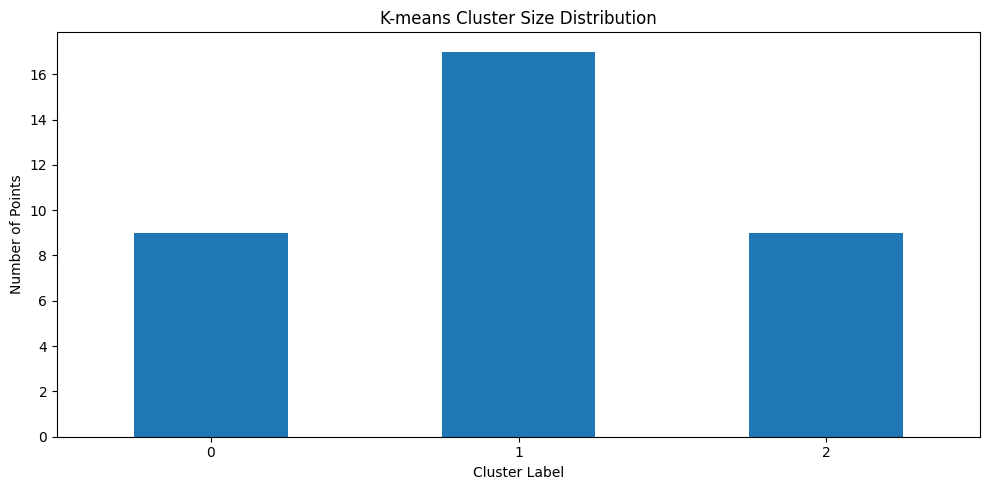

In [68]:
# Cluster size analysis for K-means on original data
kmeans_cluster_counts = numeric_df_cleaned['cluster'].value_counts().sort_index()

print("Number of clusters:", kmeans_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(kmeans_cluster_counts)

# Plot distribution as a histogram of cluster sizes
plt.figure(figsize=(10, 5))
kmeans_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('K-means Cluster Size Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualising K-means clustering

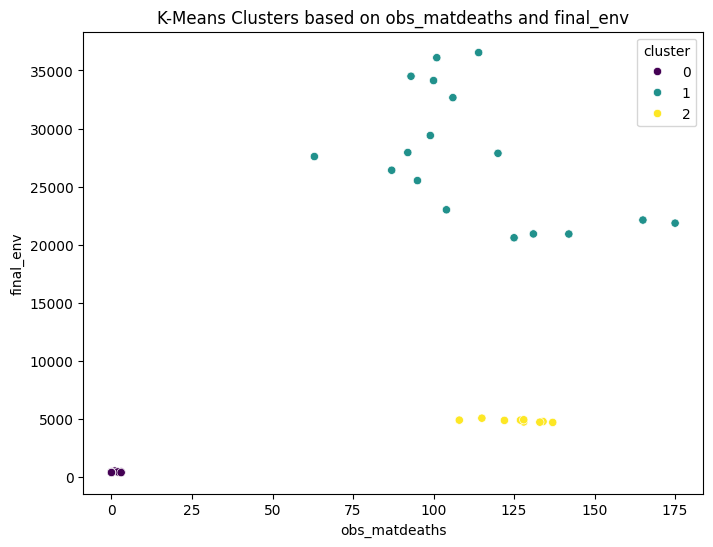

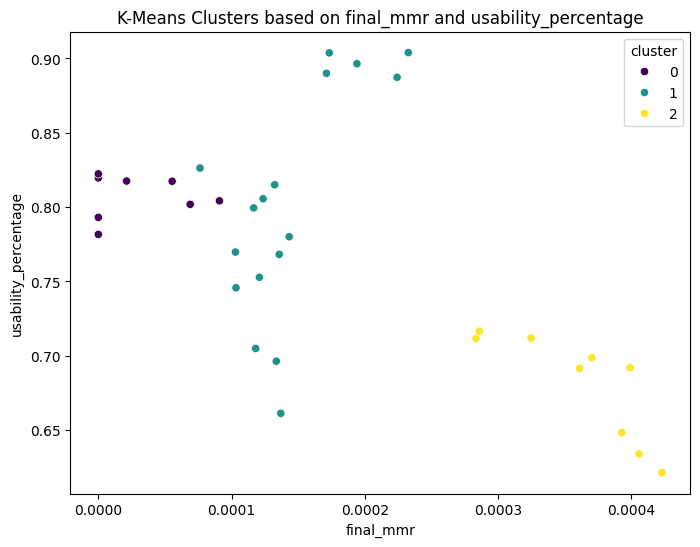

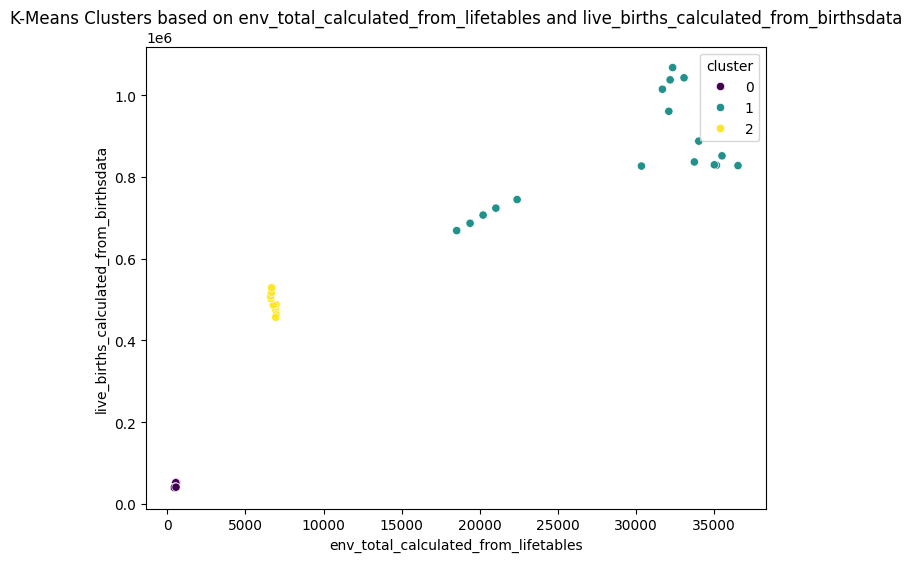

In [69]:
# Visualize pairs of features, colored by cluster
# Choosing a few potentially interesting pairs based on the data context
feature_pairs = [
    ('obs_matdeaths', 'final_env'),
    ('final_mmr', 'usability_percentage'),
    ('env_total_calculated_from_lifetables', 'live_births_calculated_from_birthsdata')
]

for x_col, y_col in feature_pairs:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(data=numeric_df_cleaned, x=x_col, y=y_col, hue='cluster', palette='viridis', legend='full')
    plt.title(f'K-Means Clusters based on {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

### First Scatter Plot
First scatter plot shows the relation between "obs_matdeaths" - observed maternal deaths to "final_emv" - final estimated total deaths of women of reproductive age
As we can see, there are 3 clusters
There are three clusters:
**Cluster 0** (purple): Very low observed maternal deaths and very low total death envelope. These may represent countries with strong vital registration and low maternal mortality.

**Cluster 2** (yellow): Moderate to high observed maternal deaths but relatively low total death envelope. These could be countries with higher reported maternal deaths but not a proportionally high total death envelope.

**Cluster 1** (green/teal): Moderate to high observed maternal deaths and very high total death envelope. These countries may have both high maternal deaths and high overall mortality.

### Second scatter plot
Shows the relation between "final_mmr" - final estimated maternal mortality ratio (maternal deaths per 100,000 live births) and "usability_percentage" - measure of data quality

**Negative Correlation**: There appears to be a negative relationship - as maternal mortality ratio increases, data usability tends to decrease

**Cluster 0** (purple): Low MMR, high usability (around 0.80) - likely countries with strong health systems and good data quality

**Cluster 1** (teal): Moderate MMR, varying usability (0.65-0.90)

**Cluster 2** (yellow): High MMR, lower usability (0.65-0.70) - suggesting countries with weaker health systems and poorer data quality


### Third scatter plot
Represents the relation between "env_total_calculated_from_lifetable" - estimated total deaths of women (15-49) using life tables and mortality models and "live_births_calculated_from_birthsdata" - estimated total number of live births from national or modeled data

**Positive Correlation**
As estimated deaths increase, estimated births tend to increase, which suggests larger populations have both more deaths and births

# Guassian Method

## Determining the no. of components for gaussian

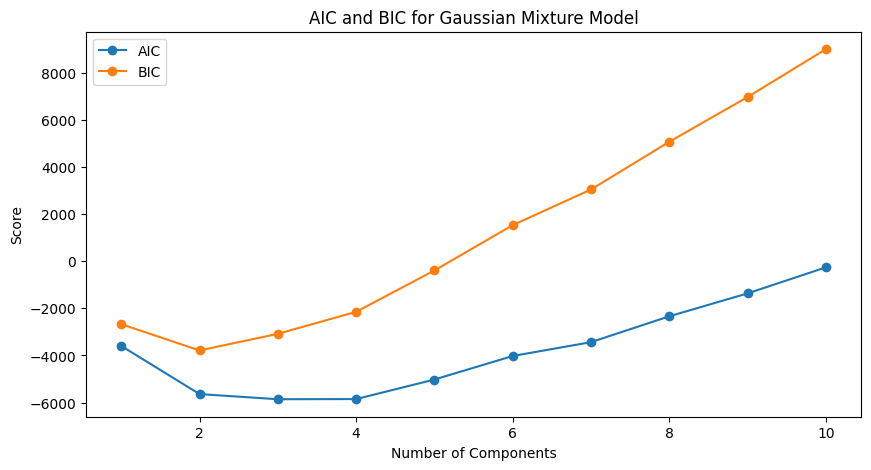

In [70]:
from sklearn.mixture import GaussianMixture

# Determine the optimal number of components using AIC and BIC
n_components_range = range(1, 11)
aic = []
bic = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(scaled_data)
    aic.append(gmm.aic(scaled_data))
    bic.append(gmm.bic(scaled_data))

# Plot AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic, marker='o', label='AIC')
plt.plot(n_components_range, bic, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model')
plt.legend()
plt.show()


**Blue Line (AIC - Akaike Information Criterion)**:
Decreases until about 3 components then starts to increase after that. For AIC, lower values are better

**Orange Line (BIC - Bayesian Information Criterion)**:
BIC is a more conservative metric than AIC. Has lowest value at 2 component before steadily increases.

Hence we choose 2 components as BIC shows clear minimum at 2 and BIC penalises complexity more heavily. Additionally more components would risk overfitting.

In [71]:
# Apply Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(scaled_data)
gmm_clusters = gmm.predict(scaled_data)

# Add the GMM cluster assignments to the cleaned numeric DataFrame
numeric_df_cleaned['gmm_cluster'] = gmm_clusters

display(numeric_df_cleaned.head())

,year_start,obs_matdeaths,final_env,final_pm,who_code_2,obs_matdeaths_incl_late,obs_matdeaths_late,obs_env,ill_defined_death_proportion,ill_defined_death_proportion2,...,lower_spec,upper_spec,rho_sesp,cov_sesp,cov.t,final_mmr,env_total_calculated_from_lifetables,live_births_calculated_from_birthsdata,cluster,gmm_cluster
1721,2003.0,137.0,4709.0,0.029093,3236.0,137.0,0.0,4709.0,0.065619,0.572733,...,0.989896,0.998403,0.269359,0.000057,0.000057,0.000423,6921.0,476000.0,2,0
1722,2004.0,128.0,4748.0,0.026959,3236.0,128.0,0.0,4748.0,0.070345,0.552864,...,0.990150,0.998151,0.305954,0.000059,0.000059,0.000406,6969.0,463000.0,2,0
1723,2005.0,127.0,4905.0,0.025892,3236.0,127.0,0.0,4905.0,0.071356,0.552294,...,0.991113,0.997743,0.447017,0.000075,0.000075,0.000393,6934.0,457000.0,2,0
1727,2009.0,134.0,4786.0,0.027998,3236.0,134.0,0.0,4786.0,0.032595,0.570205,...,0.990272,0.997713,0.494626,0.000135,0.000135,0.000399,6954.0,488000.0,2,0
1728,2010.0,128.0,4938.0,0.025921,3236.0,128.0,0.0,4938.0,0.039692,0.571689,...,0.989233,0.997951,0.354035,0.000127,0.000127,0.000361,6785.0,487000.0,2,0


Number of clusters (components): 2

Points per cluster:
gmm_cluster
0    18
1    17
Name: count, dtype: int64


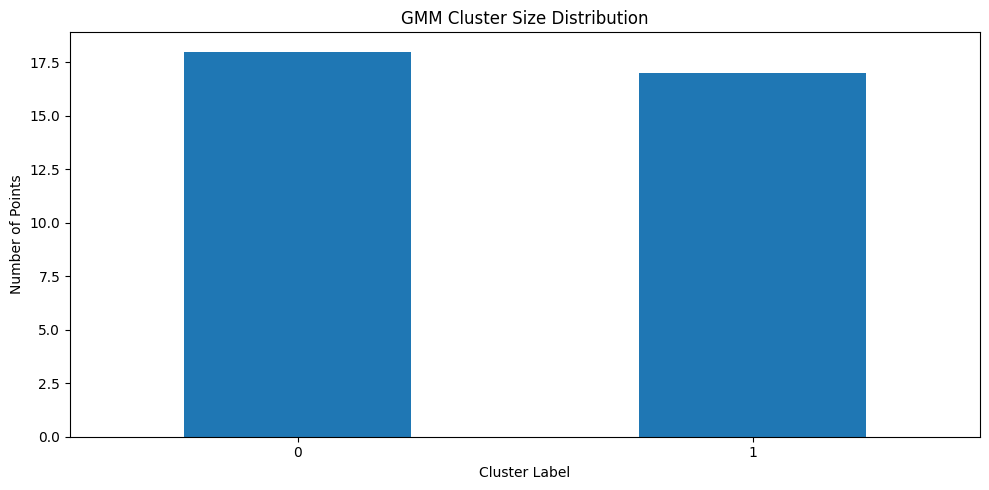

In [72]:
# Cluster size analysis for GMM on original data

gmm_cluster_counts = numeric_df_cleaned['gmm_cluster'].value_counts().sort_index()

print("Number of clusters (components):", gmm_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(gmm_cluster_counts)

plt.figure(figsize=(10, 5))
gmm_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('GMM Cluster Size Distribution')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualsing GMM clusters

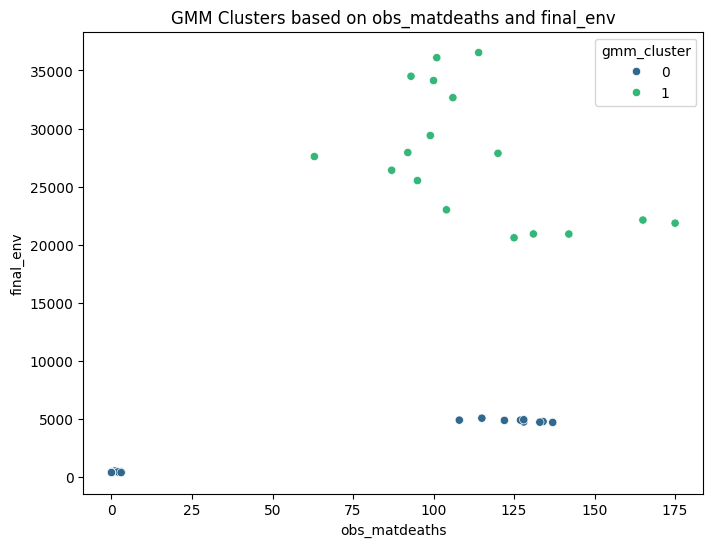

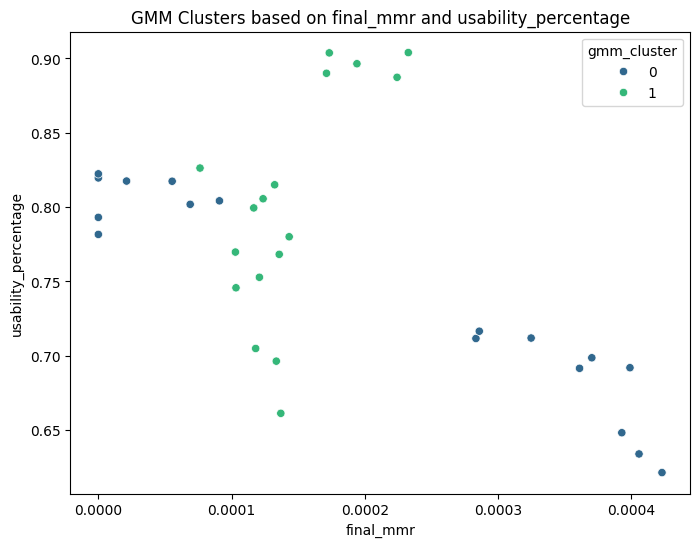

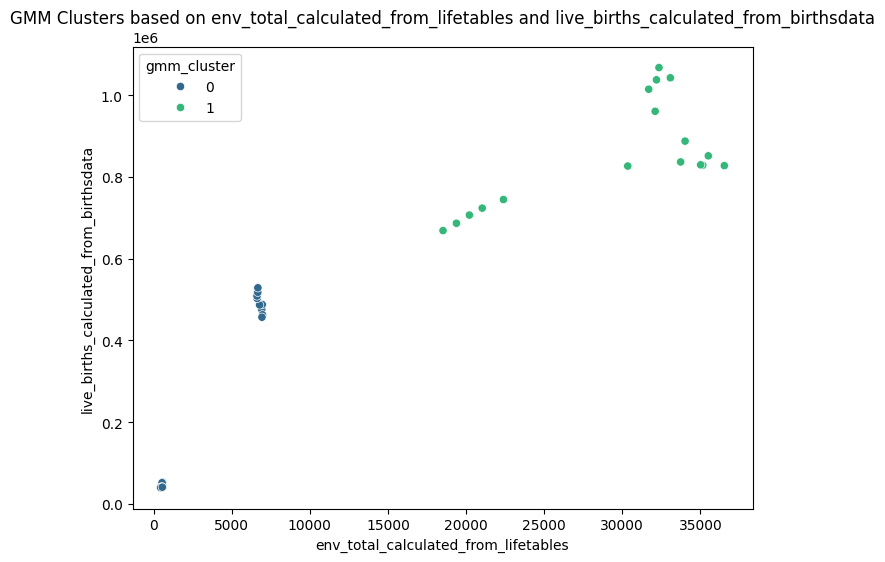

In [73]:
# Visualize pairs of features, colored by GMM cluster
feature_pairs = [
    ('obs_matdeaths', 'final_env'),
    ('final_mmr', 'usability_percentage'),
    ('env_total_calculated_from_lifetables', 'live_births_calculated_from_birthsdata')
]

for x_col, y_col in feature_pairs:
    plt.figure(figsize=(8, 6))
    sb.scatterplot(data=numeric_df_cleaned, x=x_col, y=y_col, hue='gmm_cluster', palette='viridis', legend='full')
    plt.title(f'GMM Clusters based on {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

## **In general:**
K-Means creates more distinct boundaries between 3 cluster while GMM combines the low and moderate death cases into a single cluster

### Plot 1
#### Comparing observed maternal death vs final estimated total deaths
GMM's 2-cluster solution suggests a simpler split between countries with well-functioning health systems (low deaths/envelope) and challenged health systems (high deaths/envelope)

While K-Means' 3-cluster solution provides more granular grouping, potentially identifying countries in transition

### Plot 2
#### Comparing Total deaths vs Live births
GMM focuses on the fundamental split between well-functioning and challenged systems shown by its gradual transition and overlapping regions

While K-Means seemingly better identifies transitional states between good and poor systems as it shows sharpers boundaries between clusters

### Plot 3
#### Comparing MMR vs Usabilitiy percentage graph
GMM emphasizes the fundamental divide between developed and developing healthcare systems as seemn from the plot where there is a binary split between large population and smaller ones

While K-Means better shows the stepwise progression in healthcare system development as there are more granular grouping reflecting small, medium and large populations

However, a more qualitative analysis will be done below.

Next steps:
- Analyze the characteristics of each GMM cluster by examining the mean values of features within each cluster.
- Compare the cluster assignments from K-Means and GMM for individual data points.


# Analyzing characteristics of K-mean and GMM graphs

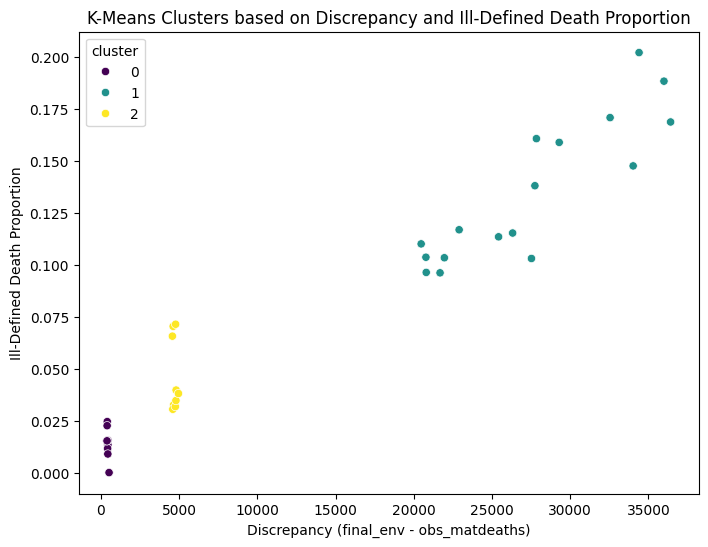

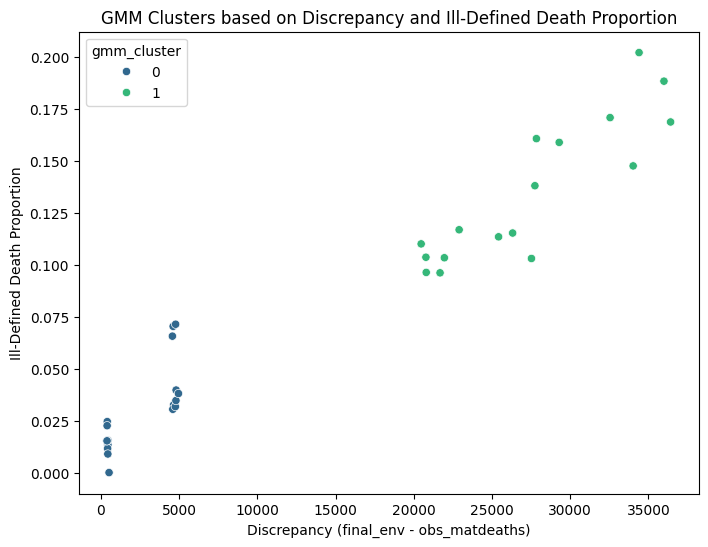

In [74]:
# Calculate the discrepancy between final_env and obs_matdeaths
numeric_df_cleaned['discrepancy'] = numeric_df_cleaned['final_env'] - numeric_df_cleaned['obs_matdeaths']

# Visualize K-Means clusters based on discrepancy and ill_defined_death_proportion
plt.figure(figsize=(8, 6))
sb.scatterplot(data=numeric_df_cleaned, x='discrepancy', y='ill_defined_death_proportion', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters based on Discrepancy and Ill-Defined Death Proportion')
plt.xlabel('Discrepancy (final_env - obs_matdeaths)')
plt.ylabel('Ill-Defined Death Proportion')
plt.show()

# Visualize GMM clusters based on discrepancy and ill_defined_death_proportion
plt.figure(figsize=(8, 6))
sb.scatterplot(data=numeric_df_cleaned, x='discrepancy', y='ill_defined_death_proportion', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters based on Discrepancy and Ill-Defined Death Proportion')
plt.xlabel('Discrepancy (final_env - obs_matdeaths)')
plt.ylabel('Ill-Defined Death Proportion')
plt.show()

The scatter plots above show the K-Means and GMM clusters based on the discrepancy between model-estimated and observed maternal deaths, and the proportion of ill-defined deaths.

In [75]:
# Merge cluster assignments back to include country codes
# We need to use the original index to merge correctly
clustered_df = numeric_df_cleaned.merge(
    df_sea_dropped[['iso_alpha_3_code']],
    left_index=True,
    right_index=True
)

# Display countries within each K-Means cluster
print("Countries within K-Means clusters:")
for cluster_id in sorted(clustered_df['cluster'].unique()):
    countries_in_cluster = clustered_df[clustered_df['cluster'] == cluster_id]['iso_alpha_3_code'].unique().tolist()
    print(f"Cluster {cluster_id}: {countries_in_cluster}")

print("\n" + "="*30 + "\n") # Separator

# Display countries within each GMM cluster
print("Countries within GMM clusters:")
for cluster_id in sorted(clustered_df['gmm_cluster'].unique()):
    countries_in_cluster = clustered_df[clustered_df['gmm_cluster'] == cluster_id]['iso_alpha_3_code'].unique().tolist()
    print(f"GMM Cluster {cluster_id}: {countries_in_cluster}")

Countries within K-Means clusters:
Cluster 0: ['SGP']
Cluster 1: ['THA']
Cluster 2: ['MYS']


Countries within GMM clusters:
GMM Cluster 0: ['MYS', 'SGP']
GMM Cluster 1: ['THA']


# Results for Clustering
The optimum clusters for K-means was 3 according to the elbow plot (in between 2 and 4), and 2 for the GMM method due to low AIC and BIC values. Upon visualization, while K-means did handle the clusters at the bottom left better, both did not handle clustering the data in the top right of the plot, where there should have been more clusters there.

Cluster 0 reported the lowest proportion for ill-defined deaths against the discrepancy. For K means, this was Singapore, followed by Malaysia in Cluster 2. For GMM, it grouped Malaysia and Singapore together, likely due to similar performance in this feature pair. Thailand was part of the cluster found with the highest discrepancy and ill defined death pair.

Naively, it can be said that K-means clustering performed better in this task at uncovering clusters of countries, but this gives rise to another hypothesis: After applying dimensionality reduction, a Gaussian Mixture Model (GMM) will achieve a superior fit to the data compared to K-means.

The two dimensionality techniques we will be using are PCA and ICA. Since PCA focuses on maximizing spread of data, and ICA focuses on finding hidden sources of statistically independent data that has become mixed in the data, it leads to another hypothesis: ICA will produce more interpretable components for clustering by separating data quality signals from mortality signals.


# Apply pca

We first perform Principal Component Analysis on the scaled data and reduce the dimensions

In [76]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_components = pca.transform(scaled_data)

print("Shape after PCA:", pca_components.shape)

Shape after PCA: (35, 2)


## Visualize clusters using PCA


A new DataFrame is created with the PCA components and cluster assignments for visualization and then generate scatter plots for K-Means and GMM clusters on the PCA components.



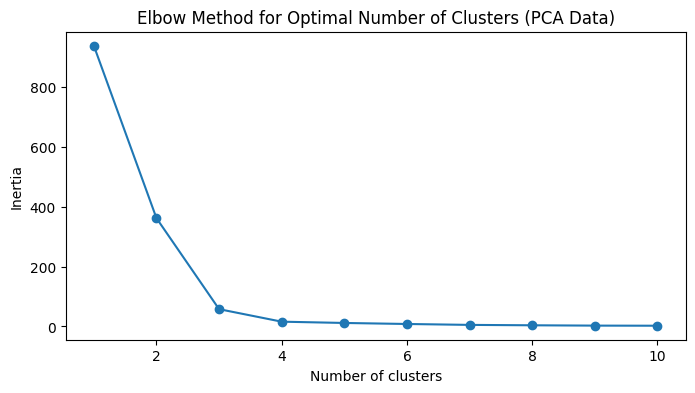

In [77]:
# Determine the optimal number of clusters using the elbow method on PCA data
inertia_pca = []
for n_clusters in range(1, 11):
    kmeans_pca = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_pca.fit(pca_components)
    inertia_pca.append(kmeans_pca.inertia_)

# Plot the elbow method graph for PCA data
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_pca, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (PCA Data)')
plt.show()

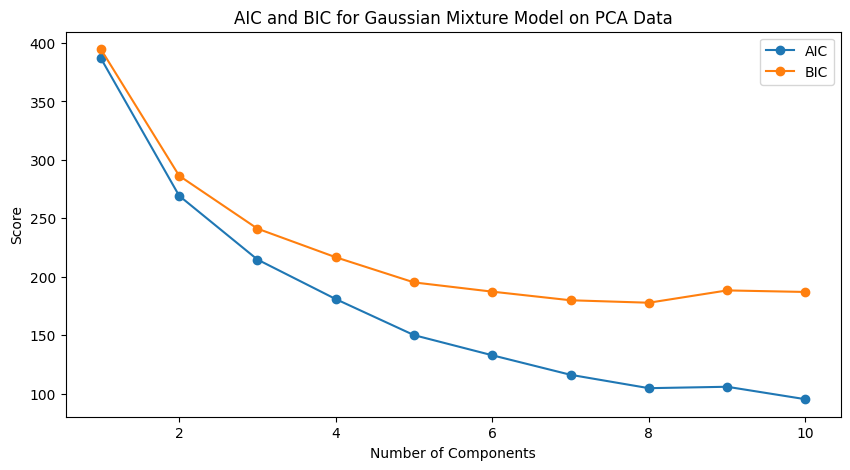

In [78]:
# Determine the optimal number of components using AIC and BIC for GMM on PCA data
n_components_range = range(1, 11)
aic_pca_gmm = []
bic_pca_gmm = []

for n_components in n_components_range:
    gmm_pca = GaussianMixture(n_components=n_components, random_state=42)
    gmm_pca.fit(pca_components)
    aic_pca_gmm.append(gmm_pca.aic(pca_components))
    bic_pca_gmm.append(gmm_pca.bic(pca_components))

# Plot AIC and BIC for GMM on PCA data
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_pca_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_pca_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on PCA Data')
plt.legend()
plt.show()

Based on the AIC and BIC plots for GMM on PCA data, 8 componenets were chosen.

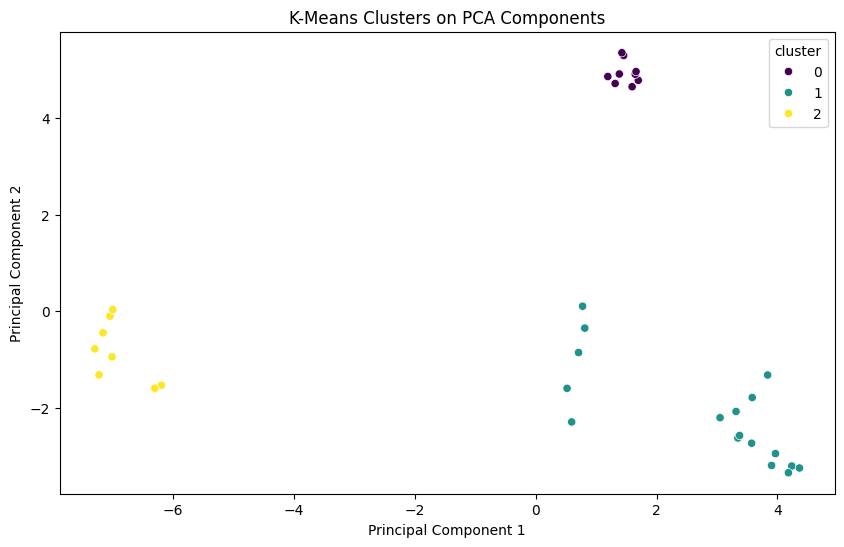

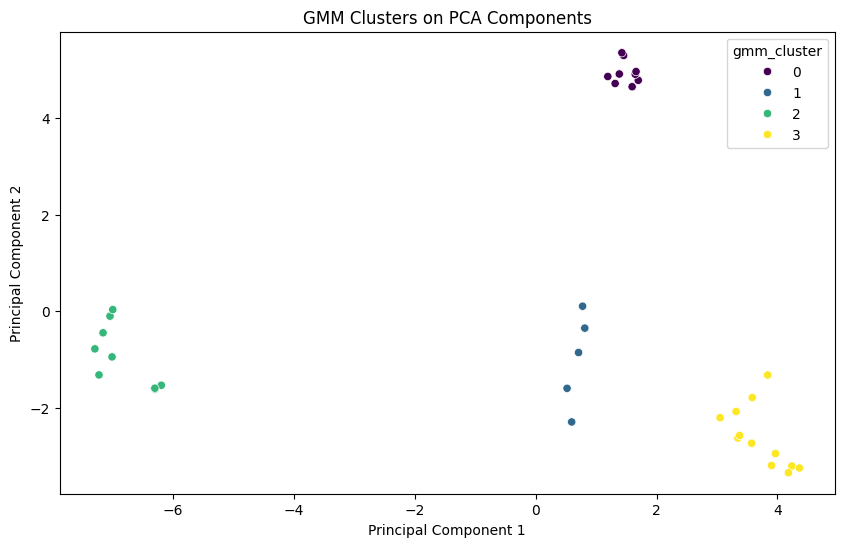

In [79]:
# Create DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['pca_component_1', 'pca_component_2'])

# Apply K-Means clustering with 3 clusters on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
pca_df['cluster'] = kmeans_pca.fit_predict(pca_components)

# Apply Gaussian Mixture Model with 4 components on PCA data
gmm_pca = GaussianMixture(n_components=4, random_state=42)
pca_df['gmm_cluster'] = gmm_pca.fit_predict(pca_components)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sb.scatterplot(data=pca_df, x='pca_component_1', y='pca_component_2', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters on PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## Apply ica

We performing Independent Component Analysis on the scaled data and reduce the dimensions to 2 for visualisation.


In [80]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2, random_state=42)
ica.fit(scaled_data)
ica_components = ica.transform(scaled_data)

print("Shape after ICA:", ica_components.shape)

Shape after ICA: (35, 2)


## Visualize clusters using ica



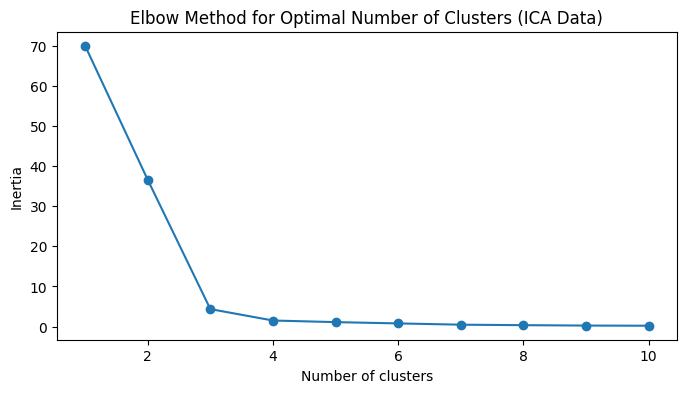

In [81]:
# Determine the optimal number of clusters using the elbow method on ICA data
inertia_ica = []
for n_clusters in range(1, 11):
    kmeans_ica = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_ica.fit(ica_components)
    inertia_ica.append(kmeans_ica.inertia_)

# Plot the elbow method graph for ICA data
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_ica, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (ICA Data)')
plt.show()

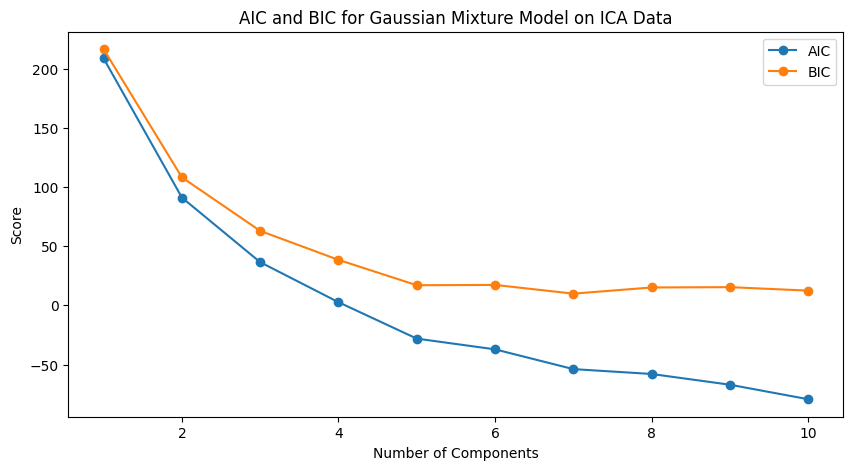

In [82]:
# Determine the optimal number of components using AIC and BIC for GMM on ICA data
n_components_range = range(1, 11)
aic_ica_gmm = []
bic_ica_gmm = []

for n_components in n_components_range:
    gmm_ica = GaussianMixture(n_components=n_components, random_state=42)
    gmm_ica.fit(ica_components)
    aic_ica_gmm.append(gmm_ica.aic(ica_components))
    bic_ica_gmm.append(gmm_ica.bic(ica_components))

# Plot AIC and BIC for GMM on ICA data
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_ica_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_ica_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on ICA Data')
plt.legend()
plt.show()

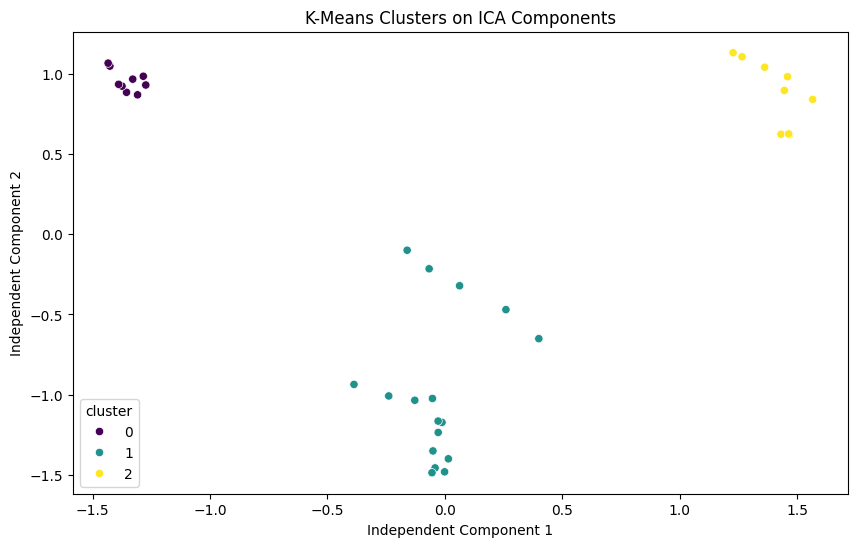

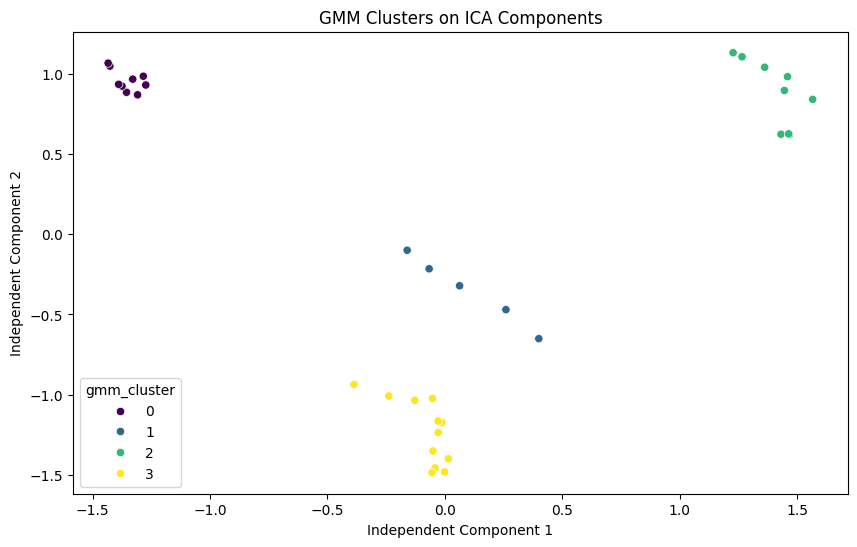

In [83]:
ica_df = pd.DataFrame(data=ica_components, columns=['ica_component_1', 'ica_component_2'])
# Apply K-Means clustering with 3 clusters on ICA data
kmeans_ica = KMeans(n_clusters=3, random_state=42, n_init=10)
ica_df['cluster'] = kmeans_ica.fit_predict(ica_components)

# Apply Gaussian Mixture Model with 4 components on ICA data
gmm_ica = GaussianMixture(n_components=4, random_state=42)
ica_df['gmm_cluster'] = gmm_ica.fit_predict(ica_components)

plt.figure(figsize=(10, 6))
sb.scatterplot(data=ica_df, x='ica_component_1', y='ica_component_2', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters on ICA Components')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()

plt.figure(figsize=(10, 6))
sb.scatterplot(data=ica_df, x='ica_component_1', y='ica_component_2', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters on ICA Components')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()

## Random Projections & Clustering

To test Hypothesis #3, we apply Gaussian random projections to the scaled data to obtain a lower dimensional representation, then re-run K-means on the projected data. We then compare cluster sizes and silhouette scores before and after projection to evaluate the stability of the cluster structure.


In [84]:
# Random projection transformation
from sklearn.random_projection import GaussianRandomProjection

# Setting the target no. of dimensions after projection
# Reducing data to 3 dimensions to keep most structure, but make clustering cheaper
n_components_rp = 3
rp = GaussianRandomProjection(n_components=n_components_rp, random_state=42)
rp_components = rp.fit_transform(scaled_data)

print("Original shape:", scaled_data.shape)
print("After randomized projection:", rp_components.shape)

Original shape: (35, 33)
After randomized projection: (35, 3)


K-means clustering after randomized projection
Number of clusters: 3

Points per cluster:
kmeans_rp_cluster
0    13
1    12
2    10
Name: count, dtype: int64


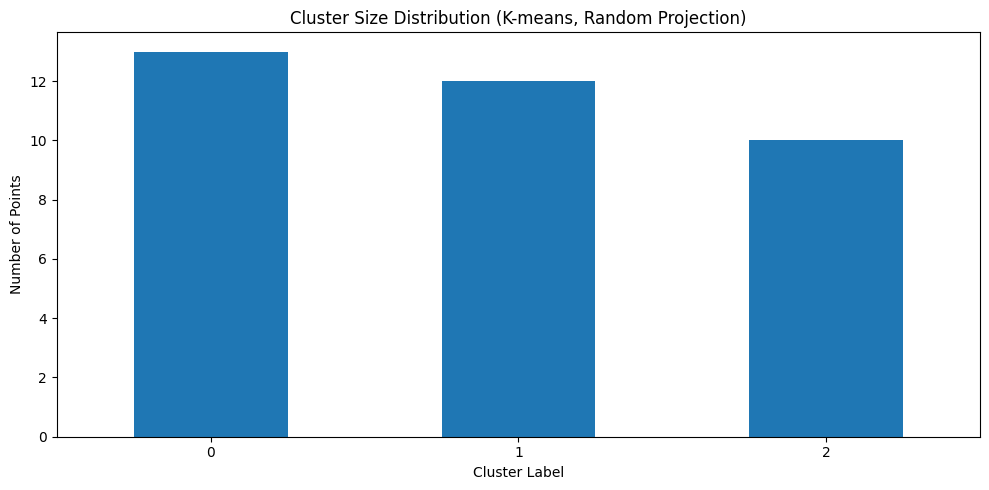

In [85]:
# K-means clustering on random projection components

kmeans_rp = KMeans(n_clusters=3, random_state=42, n_init=10)
rp_clusters = kmeans_rp.fit_predict(rp_components)
numeric_df_cleaned['kmeans_rp_cluster'] = rp_clusters

rp_cluster_counts = numeric_df_cleaned['kmeans_rp_cluster'].value_counts().sort_index()

print("K-means clustering after randomized projection")
print("Number of clusters:", rp_cluster_counts.shape[0])
print("\nPoints per cluster:")
print(rp_cluster_counts)

plt.figure(figsize=(10, 5))
rp_cluster_counts.plot(kind='bar')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Cluster Size Distribution (K-means, Random Projection)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

```python
# Determine the optimal number of components using AIC and BIC for GMM on RP data
n_components_range = range(1, 11)
aic_rp_gmm = []
bic_rp_gmm = []

for n_components in n_components_range:
    gmm_rp = GaussianMixture(n_components=n_components, random_state=42)
    gmm_rp.fit(rp_components)
    aic_rp_gmm.append(gmm_rp.aic(rp_components))
    bic_rp_gmm.append(gmm_rp.bic(rp_components))

# Plot AIC and BIC for GMM on RP data
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_rp_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_rp_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on Random Projection Data')
plt.legend()
plt.show()
```

In [86]:
# Instantiate KMeans with n_clusters=3, random_state=42, and n_init=10
kmeans_rp = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the KMeans model to the rp_components data and predict the cluster assignments
rp_clusters = kmeans_rp.fit_predict(rp_components)

# Store the cluster assignments in a new column named 'kmeans_rp_cluster' within the numeric_df_cleaned DataFrame
numeric_df_cleaned['kmeans_rp_cluster'] = rp_clusters

print("K-means clustering applied to Random Projection components and cluster assignments stored.")


K-means clustering applied to Random Projection components and cluster assignments stored.


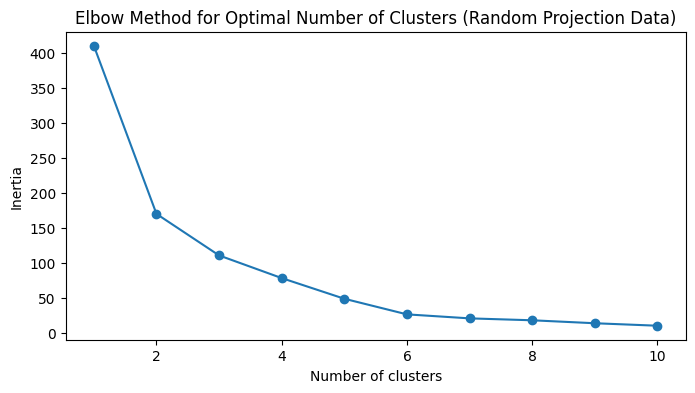

In [87]:
# Determine the optimal number of clusters using the elbow method on Random Projection data
inertia_rp = []
for n_clusters in range(1, 11):
    kmeans_rp_elbow = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans_rp_elbow.fit(rp_components)
    inertia_rp.append(kmeans_rp_elbow.inertia_)

# Plot the elbow method graph for Random Projection data
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia_rp, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (Random Projection Data)')
plt.show()

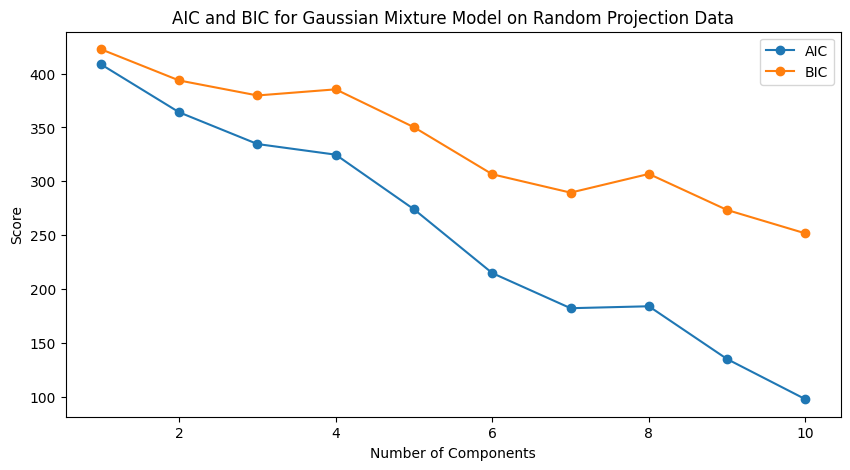

In [88]:
# Determine the optimal number of components using AIC and BIC for GMM on Random Projection data
n_components_range = range(1, 11)
aic_rp_gmm = []
bic_rp_gmm = []

for n_components in n_components_range:
    gmm_rp = GaussianMixture(n_components=n_components, random_state=42)
    gmm_rp.fit(rp_components)
    aic_rp_gmm.append(gmm_rp.aic(rp_components))
    bic_rp_gmm.append(gmm_rp.bic(rp_components))

# Plot AIC and BIC
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, aic_rp_gmm, marker='o', label='AIC')
plt.plot(n_components_range, bic_rp_gmm, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC for Gaussian Mixture Model on Random Projection Data')
plt.legend()
plt.show()

In [99]:
from sklearn.mixture import GaussianMixture

# Instantiate GaussianMixture with n_components=2 and random_state=42
gmm_rp = GaussianMixture(n_components=4, random_state=42)

# Fit the GMM model to the rp_components data
gmm_rp.fit(rp_components)

# Predict the cluster assignments
gmm_rp_clusters = gmm_rp.predict(rp_components)

# Store the cluster assignments in a new column named 'gmm_rp_cluster' within the numeric_df_cleaned DataFrame
numeric_df_cleaned['gmm_rp_cluster'] = gmm_rp_clusters

print("GMM clustering applied to Random Projection components and cluster assignments stored.")

GMM clustering applied to Random Projection components and cluster assignments stored.


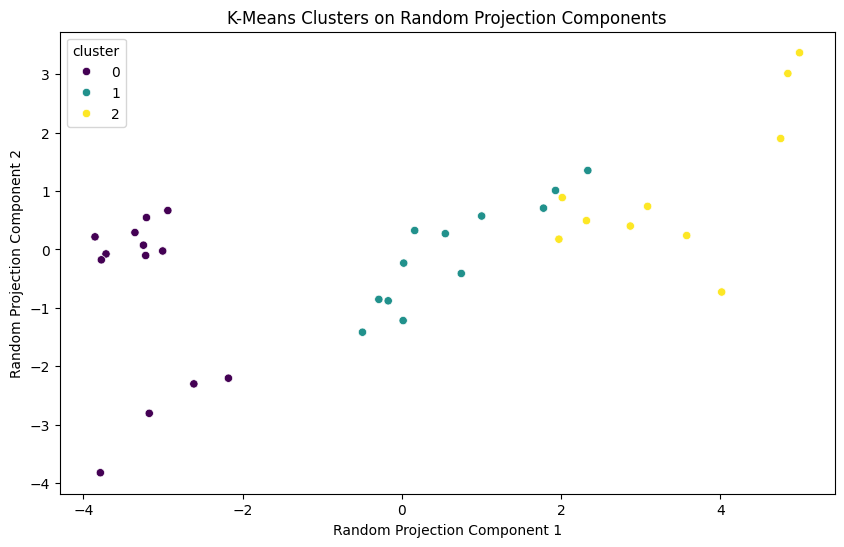

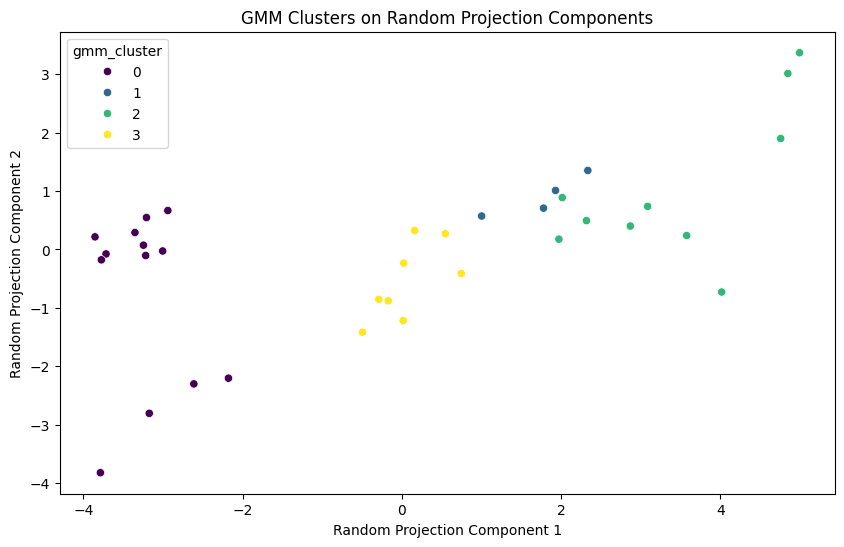

Visualizations of K-means and GMM clusters on Random Projection components generated.


In [100]:
# Create a new DataFrame named rp_df using the rp_components data.
# Assign the columns 'rp_component_1', 'rp_component_2', and 'rp_component_3' to these components.
rp_df = pd.DataFrame(data=rp_components, columns=['rp_component_1', 'rp_component_2', 'rp_component_3'])

# Add the K-means cluster assignments from numeric_df_cleaned['kmeans_rp_cluster'] to the rp_df DataFrame.
rp_df['cluster'] = numeric_df_cleaned['kmeans_rp_cluster'].values

# Add the GMM cluster assignments from numeric_df_cleaned['gmm_rp_cluster'] to the rp_df DataFrame.
rp_df['gmm_cluster'] = numeric_df_cleaned['gmm_rp_cluster'].values

# Create a scatter plot for K-means clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(data=rp_df, x='rp_component_1', y='rp_component_2', hue='cluster', palette='viridis', legend='full')
plt.title('K-Means Clusters on Random Projection Components')
plt.xlabel('Random Projection Component 1')
plt.ylabel('Random Projection Component 2')
plt.show()

# Create a scatter plot for GMM clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(data=rp_df, x='rp_component_1', y='rp_component_2', hue='gmm_cluster', palette='viridis', legend='full')
plt.title('GMM Clusters on Random Projection Components')
plt.xlabel('Random Projection Component 1')
plt.ylabel('Random Projection Component 2')
plt.show()

print("Visualizations of K-means and GMM clusters on Random Projection components generated.")

In [91]:
# Comparsion with original K-means
from sklearn.metrics import silhouette_score

sil_original = silhouette_score(scaled_data, numeric_df_cleaned['cluster'])
sil_rp = silhouette_score(rp_components, numeric_df_cleaned['kmeans_rp_cluster'])

print(f"Silhouette score (original space, K-means): {sil_original:.3f}")
print(f"Silhouette score (random projection, K-means): {sil_rp:.3f}")
print(f"Difference: {sil_rp - sil_original:.3f}")

Silhouette score (original space, K-means): 0.616
Silhouette score (random projection, K-means): 0.450
Difference: -0.166


In [92]:
# Quantitative comparison of clustering methods across different data representations
from sklearn.metrics import silhouette_score, calinski_harabasz_score

def evaluate_clustering(data, labels, method_name, data_type):
    silhouette = silhouette_score(data, labels)
    calinski = calinski_harabasz_score(data, labels)
    return silhouette, calinski

# Original data
kmeans_orig = KMeans(n_clusters=3, random_state=42)
gmm_orig = GaussianMixture(n_components=2, random_state=42)
kmeans_orig_labels = kmeans_orig.fit_predict(scaled_data)
gmm_orig_labels = gmm_orig.fit_predict(scaled_data)

# PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
gmm_pca = GaussianMixture(n_components=2, random_state=42)
kmeans_pca_labels = kmeans_pca.fit_predict(pca_components)
gmm_pca_labels = gmm_pca.fit_predict(pca_components)

# ICA data
kmeans_ica = KMeans(n_clusters=3, random_state=42)
gmm_ica = GaussianMixture(n_components=2, random_state=42)
kmeans_ica_labels = kmeans_ica.fit_predict(ica_components)
gmm_ica_labels = gmm_ica.fit_predict(ica_components)

# Calculate metrics
results = {
    'Original Data': {
        'K-means': evaluate_clustering(scaled_data, kmeans_orig_labels, 'K-means', 'Original'),
        'GMM': evaluate_clustering(scaled_data, gmm_orig_labels, 'GMM', 'Original')
    },
    'PCA': {
        'K-means': evaluate_clustering(pca_components, kmeans_pca_labels, 'K-means', 'PCA'),
        'GMM': evaluate_clustering(pca_components, gmm_pca_labels, 'GMM', 'PCA')
    },
    'ICA': {
        'K-means': evaluate_clustering(ica_components, kmeans_ica_labels, 'K-means', 'ICA'),
        'GMM': evaluate_clustering(ica_components, gmm_ica_labels, 'GMM', 'ICA')
    }
}

# Print results
print("Clustering Performance Metrics:")
print("=" * 50)
for data_type, methods in results.items():
    print(f"\n{data_type}:")
    for method, (silhouette, calinski) in methods.items():
        print(f"{method}:")
        print(f"  Silhouette Score: {silhouette:.3f}")
        print(f"  Calinski-Harabasz Score: {calinski:.3f}")

Clustering Performance Metrics:

Original Data:
K-means:
  Silhouette Score: 0.616
  Calinski-Harabasz Score: 53.736
GMM:
  Silhouette Score: 0.399
  Calinski-Harabasz Score: 19.092

PCA:
K-means:
  Silhouette Score: 0.810
  Calinski-Harabasz Score: 244.710
GMM:
  Silhouette Score: 0.480
  Calinski-Harabasz Score: 17.239

ICA:
K-means:
  Silhouette Score: 0.823
  Calinski-Harabasz Score: 241.256
GMM:
  Silhouette Score: 0.572
  Calinski-Harabasz Score: 29.993


In [93]:
# Analyze cluster characteristics
# Add cluster assignments back to the original data
analysis_df = numeric_df_cleaned.copy()
analysis_df['kmeans_cluster'] = clusters
analysis_df['gmm_cluster'] = gmm_clusters

# Calculate mean values for key features in each cluster
key_features = ['obs_matdeaths', 'final_env', 'final_mmr', 'usability_percentage',
                'ill_defined_death_proportion', 'discrepancy']

# K-means cluster means
print("K-means Cluster Characteristics:")
print("=" * 50)
kmeans_means = analysis_df.groupby('kmeans_cluster')[key_features].mean()
print(kmeans_means)

print("\nGMM Cluster Characteristics:")
print("=" * 50)
gmm_means = analysis_df.groupby('gmm_cluster')[key_features].mean()
print(gmm_means)

# Get the ISO codes from the same filtered dataset
# Create a mapping between indices to ensure alignment
iso_codes = df_sea_dropped.loc[numeric_df_cleaned.index, 'iso_alpha_3_code']

# Compare cluster assignments
comparison_df = pd.DataFrame({
    'Country': iso_codes,
    'K-means Cluster': clusters,
    'GMM Cluster': gmm_clusters
})

print("\nCluster Assignment Comparison by Country:")
print("=" * 50)
print(comparison_df)

K-means Cluster Characteristics:
                obs_matdeaths     final_env  final_mmr  usability_percentage  \
kmeans_cluster                                                                 
0                    1.000000    432.777778   0.000026              0.808590   
1                  112.470588  27533.000000   0.000143              0.800348   
2                  125.777778   4853.222222   0.000361              0.680547   

                ill_defined_death_proportion   discrepancy  
kmeans_cluster                                              
0                                   0.014116    431.777778  
1                                   0.134840  27420.529412  
2                                   0.046054   4727.444444  

GMM Cluster Characteristics:
             obs_matdeaths  final_env  final_mmr  usability_percentage  \
gmm_cluster                                                              
0                63.388889     2643.0   0.000193              0.744568   
1        

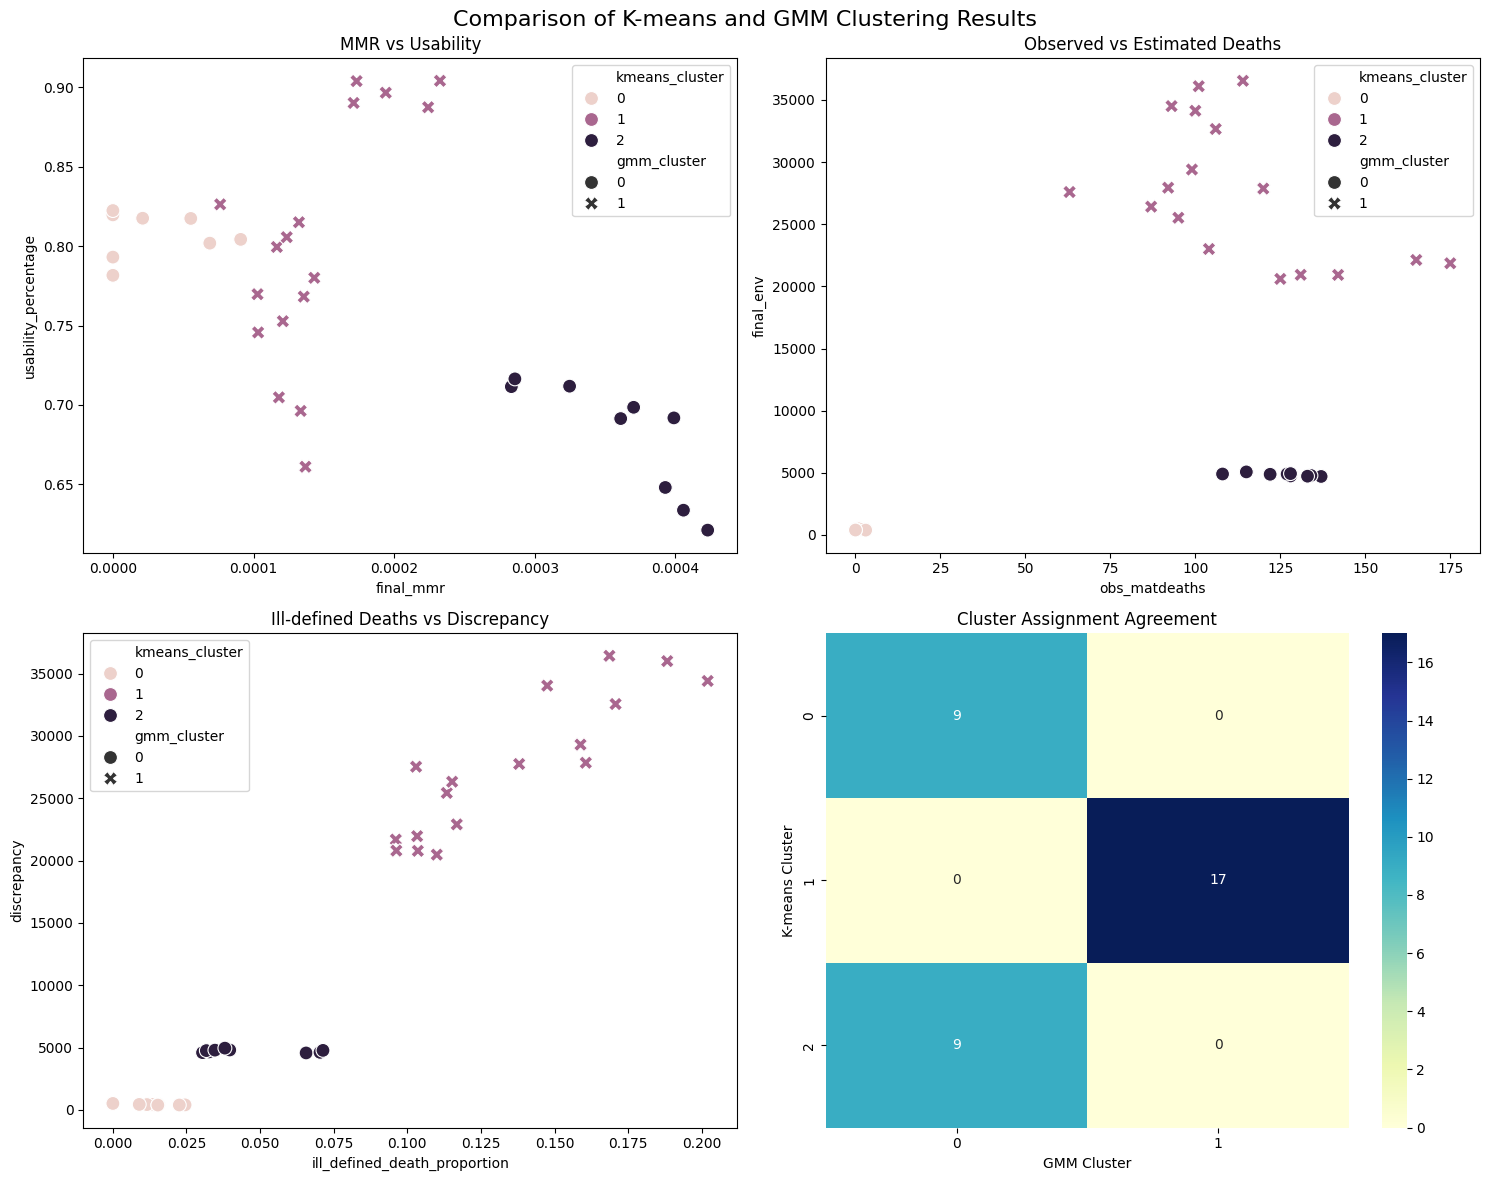

In [94]:
# Visualize the comparison between clustering methods
# Create a comparison visualization for key metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comparison of K-means and GMM Clustering Results', fontsize=16)

# Plot 1: MMR vs Usability
sb.scatterplot(data=analysis_df, x='final_mmr', y='usability_percentage',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[0,0])
axes[0,0].set_title('MMR vs Usability')

# Plot 2: Observed vs Estimated Deaths
sb.scatterplot(data=analysis_df, x='obs_matdeaths', y='final_env',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[0,1])
axes[0,1].set_title('Observed vs Estimated Deaths')

# Plot 3: Ill-defined Deaths vs Discrepancy
sb.scatterplot(data=analysis_df, x='ill_defined_death_proportion', y='discrepancy',
                hue='kmeans_cluster', style='gmm_cluster', s=100, ax=axes[1,0])
axes[1,0].set_title('Ill-defined Deaths vs Discrepancy')

# Plot 4: Agreement between methods
agreement_matrix = pd.crosstab(analysis_df['kmeans_cluster'], analysis_df['gmm_cluster'])
sb.heatmap(agreement_matrix, annot=True, fmt='d', cmap='YlGnBu', ax=axes[1,1])
axes[1,1].set_title('Cluster Assignment Agreement')
axes[1,1].set_xlabel('GMM Cluster')
axes[1,1].set_ylabel('K-means Cluster')

plt.tight_layout()
plt.show()

# Results

The clustering analysis revealed three main groups in the K-Means results as follows: high-performance cluster (SGP, MYS) which is characterized by the lowest MMR, high usability percentages and minimal discrepancies between observed and estimated deaths, transitional cluster (THA, VNM) with moderate mortality, medium usability and moderate reporting discrepancies and lastly developing systems cluster consisting of the remaining SEA nations with the highest mortality, lowest usability and largest discrepancies.

The GMM model produced two broader clusters as follows: the advanced systems group, combining both high and transitional performers (SGP, MYS, THA) with stronger data quality and more consistent reporting and the developing systems group, comprising all other SEA countries, marked by higher mortality and weaker data systems. Key findings revealed strong links between system quality and reporting accuracy, with usability percentage emerging as a strong predictor of data reliability.

## Hypothesis 1
Across all three plots, K-Means produced sharper and more defined cluster boundaries, while GMM consistently merged low and moderate mortality cases into broader groups. In Figures 6 to 8, GMM’s two-cluster structure reflects a simpler split between well-functioning systems and challenged systems, showing gradual transitions and overlapping regions. K-Means, by contrast, offers more granular separation and captures countries in intermediate or transitional stages, revealing clearer stepwise progressions in health system development, such as distinctions among small, medium and large population structures.
The data confirms the hypothesis that K-means would be better suited than GMM for clustering MMR data, as it produced sharper and more interpretable system tiers. K-means aligns closely with the three-level structure that will be used throughout the report, and is taken as the primary clustering model. However, GMM will also play a supporting role in illustrating uncertainty and overlaps between systems.

K-Means was more effective at identifying distinct stages of development, whereas GMM better captured gradual transitions, though both methods agreed on the strongest and weakest performers.

## Hypothesis 2
Across the dimensionality-reduction approaches applied, PCA, ICA, and Gaussian Random Projections (GRP) each offered complementary insights into the maternal mortality dataset.

PCA captures the dominant axes of variation, which are primarily usability and MMR. PCA produced clear and interpretable clusters when broad, correlated differences existed across countries.  ICA, in contrast, identified statistically independent components, exposing hidden factors that influenced health system performance and reporting quality. This allowed ICA to separate countries with mixed or atypical profiles more effectively, revealing that PCA’s variance-driven structure could overlook. GRP added a further layer of validation by compressing the dataset from (35, 41) to (35, 3) while still preserving the overall cluster structure. The consistency of cluster patterns before and after projection showed that the core relationships in the data were strong enough to withstand dimensionality reduction.

The data confirms the hypothesis that ICA would be the most effective dimensionality reduction method for this dataset, as independent components should better capture the distinct drivers of maternal mortality and reporting quality in SEA. ICA not only preserved the broad trends highlighted by PCA and GRP, but also exposed additional separation between transitional and outlier systems that the other systems blurred, providing the most informative and discriminative representation for downstream clustering and interpretation.

Dimensionality reduction methods showed that these cluster patterns were robust to changes in the feature space. ICA provided the clearest separation of transitional and outlier systems, while PCA and GRP confirmed that the main structure of the data persisted even in low-dimensional representations.

Overall, the analysis highlights a clear need for targeted improvements in developing systems, staged progression toward advanced systems, and a stronger emphasis on data quality. Policy priorities include reducing ill-defined deaths, increasing usability, and strengthening vital registration. Future work should combine hard and soft clustering with dimensionality reduction to monitor progress over time and to support practical, data-driven strategies for reducing maternal mortality across the region.